# SPL.Interpoliavimas splainais

### SPL1. Tiesinis splainas (pirmojo laipsnio splainas)
Pirmojo laipsnio splainas - tai splainas, kuriame daugianariai:
$$ P_i^1(x) = \sum_{k=0}^1 = a_0^{(i)} + a_1^{(i)}x $$

Iš daugianarių sudarius sistemą ir ją išsprendus, gauname:
$$ a_0^{(i)} = \frac{ x_{i+1}y_i  - x_iy_{i+1}}{x_{i+1} - x_i}, \quad a_1^{(i)} = \frac{ y_{i+1}-y_i }{ x_{i+1} - x_i } $$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
x = np.array([1,2,3,4,5,6])
#y = np.array([4,3,5,-3,0,2]) # Use if there is no function
f = lambda t: np.log(t)
y = f(x) # Use if there is a function
n = len(x)
I = np.arange(0,n-1)
t = np.arange(x[0], x[n-1], 0.001)

In [3]:
def a0(X, Xi, Y, Yi):
    return ( Xi*Y - X*Yi )/( Xi - X ) 

def a1(X, Xi, Y, Yi):
    return ( Yi - Y )/( Xi - X ) 

def S(t, arr):
    arr.append(a0(x[i], x[i+1], y[i], y[i+1]) + a1(x[i], x[i+1], y[i], y[i+1])*t) 

def plot_spline(X, Y, T, P, F):
    plt.title("Pirmojo laipsnio splaino interpoliavimas")
    plt.plot(T, P, color="r")
    plt.plot(T, F, 'g', linestyle='dashed')
    (markers, stemlines, baseline) = plt.stem(X, Y)
    plt.setp(baseline, linestyle="-", color="black", linewidth=1)
    plt.show()
    
def error_f(T, F, P):
    return F(T) - P

def plot_err(T, F, P):
    plt.title('Absoliutine paklaida')
    plt.plot(T,  error_f(T, F, P))
    plt.axhline(y=0, color='black', linewidth=1)
    plt.show()
    
def check(R, W):
    epsilon = 1e-3
    return all((R-W) < epsilon)

In [4]:
p = []    
for i in range(len(x)-1):
    for j in t:
        if x[i] <= j < x[i+1]: S(j, p)

### Pasitikrinimas, ar splainas teisingas

In [5]:
Sx = []
for i in range(len(x)-1):
    for j in x:
        if x[i] <= j < x[i+1]: S(j, Sx)
    
S(x[-1], Sx)
print(f" True if spline is correct: {check(Sx, f(x))}")

 True if spline is correct: True


### Splaino plotinimas

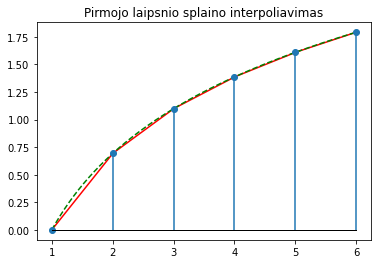

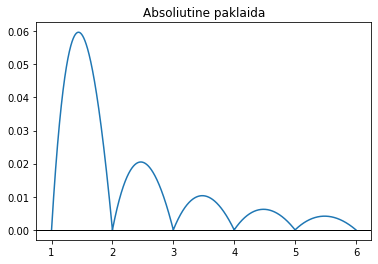

In [6]:
warnings.filterwarnings("ignore")
plot_spline(x, y, t, p, f(t)) # add function f(t) as the last argument, if there is
plot_err(t,f,p) # plot only if there is a function

### SPL2. Kvadratinis splainas (antrojo laipsnio splainas)

In [27]:
x = np.array([1, 2, 5])
f = lambda t: np.sin(t)
y = f(x)
#y = np.array([5,10,5])
d0 = np.cos(x[0])

delta0 = -(x[0] - x[1])**2
delta1 = -(x[1] - x[2])**2

print(delta0, delta1)
def a_0(X, Y, D0):
    a = [[Y[0], X[0], (X[0])**2], [Y[1], X[1], (X[1])**2], [d0, 1, 2*X[0]]]
    return (1/D0) * np.linalg.det(a)

def a_1(X, Y, D0):
    a = [[1, Y[0], (X[0])**2], [1, Y[1], (X[1])**2], [0, d0, 2*X[0]]]
    return (1/D0) * np.linalg.det(a)

def a_2(X, Y, D0):
    a = [[1, X[0], Y[0]], [1, X[1], Y[1]], [0, 1, d0]]
    return (1/D0) * np.linalg.det(a)

def a_01(X, Y, D1):
    a = [[Y[1], X[1], (X[1]**2)], [Y[2], X[2], (X[2]**2)], [d1, 1, 2*X[1]]]
    return (1/D1) * np.linalg.det(a)

def a_11(X, Y, D1):
    a = [[1, Y[1], (X[1]**2)], [1, Y[2], (X[2]**2)], [0, d1, 2*X[1]]]
    return (1/D1) * np.linalg.det(a)

def a_21(X, Y, D1):
    a = [[1, X[1], Y[1]], [1, X[2], Y[2]], [0, 1, d1]]
    return (1/D1) * np.linalg.det(a)

def plot_spline_nof(t_0, t_1, t_, S_0, S_1, T_0, T_1, xlim_min, xlim_max):
    offset = 0
    plt.title("Antrojo laipsnio splaino interpoliavimas")
    plt.axis([xlim_min - offset, xlim_max + offset, -5, 15]) #optional zooming in graph
    plt.plot(t_0, S_0, color='r')
    plt.plot(t_1, S_1, color='b')
    plt.plot(t_, T_0, 'gray', linestyle='dashed') 
    plt.plot(t_, T_1, 'gray', linestyle='dashed') 
    plt.legend(('S0', 'S1', 'T0', 'T1'))
    plt.show()
    
def plot_spline_f(t_0, t_1, t_, S_0, S_1, T_0, T_1, xlim_min, xlim_max):
    offset = 0.2
    plt.title("Antrojo laipsnio splaino interpoliavimas")
    #plt.axis([xlim_min - offset, xlim_max + offset, 0, 1]) #optional zooming in graph
    plt.plot(t_0, S_0, color='r')
    plt.plot(t_1, S_1, color='b')
    plt.plot(t, f(t), 'black', linestyle='dashed')
    plt.legend(('S0', 'S1', 'F'))
    plt.show()
    
def error_f(S, f):
    return S - f
    
def error_plot(_t, s_err):
    plt.title("Absoliutinė paklaida")
    plt.plot(_t, s_err)
    plt.axhline(y=0, color='black', linewidth=1)
    plt.show()
    
print(f(x))

-1 -9
[ 0.84147098  0.90929743 -0.95892427]


-0.47247586385035456


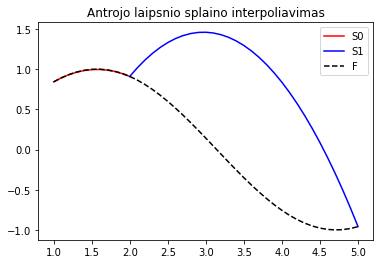

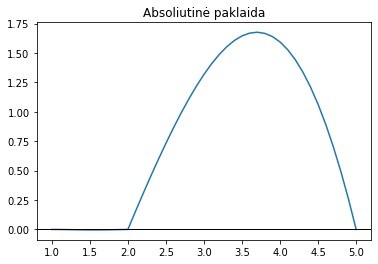

-0.5861311503995036


In [28]:
a0 = a_0(x, y, delta0)
a1 = a_1(x, y, delta0)
a2 = a_2(x, y, delta0)
a01 = a_01(x, y, delta1)
a11 = a_11(x, y, delta1)
a21 = a_21(x, y, delta1)

d1 = a1 + (2*a2*x[1])
print(a2)
t0 = np.arange(x[0], x[1]+0.1, 0.1)
t1 = np.arange(x[1], x[2]+0.1, 0.1)
t = np.arange(x[0], x[2]+0.1, 0.1)
S0 = lambda t: a0 + (a1 * t) + (a2*(t**2))
S1 = lambda t: a01 + (a11 * t) + (a21*(t**2))
T0 = lambda t: d0 * (t - x[0]) + y[0]
T1 = lambda t: d1 * (t - x[1]) + y[1]

plot_spline_f(t0, t1, t, S0(t0), S1(t1), T0(t), T1(t), x[0], x[-1])
#plot_spline_nof(t0, t1, t, S0(t0), S1(t1), T0(t), T1(t), x[0], x[-1])

S_err = np.concatenate((error_f(S0(t0), f(t0))[:-1], error_f(S1(t1), f(t1))))
error_plot(t, S_err) # plot only if there is a function
print(a21)

### SPL3. Kubinis splainas (trečiojo laipsnio splainas)
Trečiojo laipsnio splainas - tai splainas, kuriame daugianariai:
$$ P_i^1(x) = \sum_{k=0}^1 = a_0^{(i)} + a_1^{(i)}x + a_2^{(i)}x^2 + a_3^{(i)}x^3$$



In [3]:
x = np.array([1,2,3])
f = lambda t: np.sin(2*t)/t
y = f(x)
d0p = -1
d0pp = -5

def a(X, Y, D0p, D0pp):
    A = np.array([[1, X[0], (X[0]**2), (X[0]**3)], [1, X[1], (X[1]**2), (X[1]**3)], [0, 1, 2*X[0], 3*(X[0]**2)], [0, 0, 2, 6*X[0]]])
    C = np.array([Y[0], Y[1], D0p, D0pp]).T
    return np.dot(np.linalg.inv(A), C)

def error_f(S, f):
    return S - f
    
def plot_x_segment(t_x, T, S_x, title, legend, F):
    plt.title(title)
    plt.axis([0, 3, 0, 1]) # optional for zooming
    plt.plot(t_x, S_x(t_x), color='r', linewidth=3)
    plt.plot(T, S_x(T), color='b', linestyle='dashed')
    plt.plot(T, F(T), color='gray', linestyle='dashed')
    plt.legend(legend)
    plt.show()
    
def plot_cubic_spline(t_0, t_1, T, S_0, S_1, F):
    plt.title('Kubinis splainas')
    plt.plot(t_0, S_0(t_0), color='r', linewidth=3)
    plt.plot(t_1, S_1(t_1), color='g', linewidth=3)
    plt.plot(T, F(T), color='gray', linestyle='dashed')
    plt.legend(('S0(t0)', 'S1(t1)', 'f(t)'))
    plt.show()
    
def plot_err(t_0, t_1, s0_err, s1_err):
    plt.title('Kubinio splaino absoliutinė paklaida')
    plt.plot(t_0, s0_err, c='r')
    plt.plot(t_1, s1_err, c='b')
    plt.legend(('S0(t0) - f(t0)', 'S1(t1) - f(t1)'))
    plt.axhline(y=0, color='black', linewidth=1)
    plt.show()

In [4]:
A = a(x,y,d0p,d0pp)
S0 = lambda t: A[0] + A[1]*t + A[2]*(t**2) + A[3]*(t**3)
S0p = lambda t: A[1] + 2*A[2]*t + 3*A[3]*(t**2)
S0pp = lambda t: 2*A[2] + 6*A[3]*t

t0 = np.arange(x[0], x[1]+0.01, 0.01)
t = np.arange(0, x[-1]+0.01, 0.01)

In [5]:
d1p = S0p(x[1])
d1pp = S0pp(x[1])

def b(X, Y, D1p, D1pp):
    B = np.array([[1, X[1], (X[1]**2), (X[1]**3)], [1, X[2], (X[2]**2), (X[2]**3)], [0, 1, 2*X[1], 3*(X[1]**2)], [0, 0, 2, 6*X[1]]])
    D = np.array([Y[1], Y[2], D1p, D1pp]).T
    return np.dot(np.linalg.inv(B), D)

<ipython-input-3-a673b46afbd9>:2: RuntimeWarning: invalid value encountered in true_divide
  f = lambda t: np.sin(2*t)/t


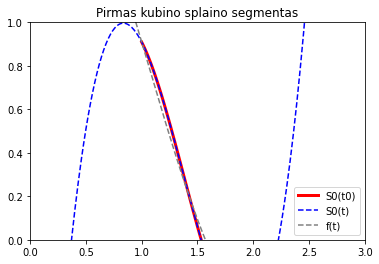

<ipython-input-3-a673b46afbd9>:2: RuntimeWarning: invalid value encountered in true_divide
  f = lambda t: np.sin(2*t)/t


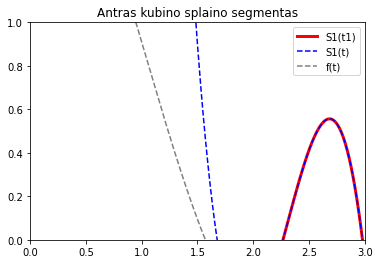

<ipython-input-3-a673b46afbd9>:2: RuntimeWarning: invalid value encountered in true_divide
  f = lambda t: np.sin(2*t)/t


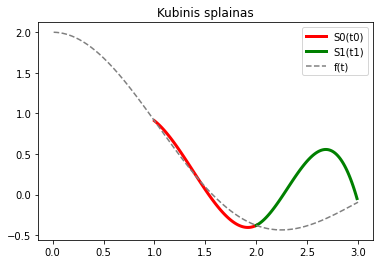

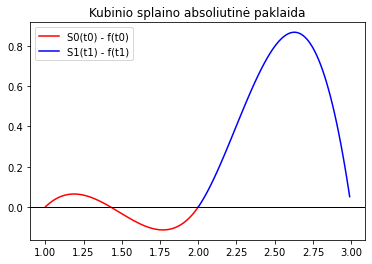

In [6]:
B = b(x,y,d1p,d1pp)
S1 = lambda t: B[0] + B[1]*t + B[2]*(t**2) + B[3]*(t**3)
S1p = lambda t: B[1] + 2*B[2]*t + 3*B[3]*(t**2)
S1pp = lambda t: 2*B[2] + 6*B[3]*t

t1 = np.arange(x[1], x[2], 0.01)
t_err = np.arange(x[0], x[2], 0.01)
plot_x_segment(t0, t, S0, 'Pirmas kubino splaino segmentas', ('S0(t0)', 'S0(t)', 'f(t)'), f)
plot_x_segment(t1, t, S1, 'Antras kubino splaino segmentas', ('S1(t1)', 'S1(t)', 'f(t)'), f)
plot_cubic_spline(t0, t1, t, S0, S1, f)

S0_err = error_f(S0(t0), f(t0))
S1_err = error_f(S1(t1), f(t1))
plot_err(t0, t1, S0_err, S1_err)